In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Descriptors import ExactMolWt

In [32]:
df = pd.read_csv("39_Formose reaction_MeOH.csv")#glucose_dry_impcols.csv
print(df.columns)

Index(['Peak Number', 'Mass', 'Rel. Abundance', 'RP', 'Kendrick Mass',
       'Nom. Mass', 'Odd/Even', 'Nom. Z', 'KMD', 'Series Fit', 'DBE', 'Group',
       'Unnamed: 12', 'Molecular Formula', 'Carbon', 'C count', 'Hydrogen',
       'H count', 'Nitrogen', 'N count', 'Oxygen', 'O Count', 'Sulphur',
       'S count', 'Carbon-13', 'C13 count', 'Unnamed: 17', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')


In [33]:
# first get rid of empty lines in the mass list by replacing with ''
df.replace('', np.nan, inplace=True)
# also, some 'Mass' values are not numbers
df.dropna(subset=['Mass'], inplace=True)
# now replace NaNs with '' to avoid weird errors
df.fillna('', inplace=True)
df.shape
df.head()


,Peak Number,Mass,Rel. Abundance,RP,Kendrick Mass,Nom. Mass,Odd/Even,Nom. Z,KMD,Series Fit,...,N count,Oxygen,O Count,Sulphur,S count,Carbon-13,C13 count,Unnamed: 17,Unnamed: 27,Unnamed: 28
0,1,514.284397,68.8455,823974.98,513.7102,514.0,1.0,-4.0,290.0,0.0,...,1.0,O,7.0,S,1.0,,,,,
1,2,276.059461,0.5320,1401642.92,275.7512,276.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
2,3,290.075110,2.6118,1349914.31,289.7512,290.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
3,4,304.090759,6.3988,1268469.88,303.7512,304.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
4,5,318.106404,9.5062,1208069.95,317.7512,318.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,


In [34]:
# make a list of exact mass and relative abundance.
mass_list = []
rel_abundance = []
for i in range(len(df)):
    # allow entire spectrum for this one
    if float(df['Mass'].iloc[i]) < 217 and "No Hit" not in df['Molecular Formula'].iloc[i]:
        mass_list.append(float(df['Mass'].iloc[i]))
        rel_abundance.append(float(df['Rel. Abundance'].iloc[i]))
# now, "renormalize" the relative abundance.
highest = max(rel_abundance)
norm_factor = 100.0/highest
normalized_abun = []
for ab in rel_abundance:
    normalized_abun.append(norm_factor*ab)
print(f'{len(mass_list)} items in {mass_list}')


108 items in [192.038356, 206.054001, 210.048912, 180.038364, 194.054006, 208.069649, 178.059103, 192.074743, 212.06456, 176.043447, 190.059092, 204.074733, 182.054013, 196.069657, 210.085297, 216.074728, 180.074752, 208.106032, 216.059472, 184.069662, 198.085305, 207.051041, 177.040493, 191.05614, 177.019367, 191.035002, 205.050645, 207.029909, 195.029916, 209.045558, 179.035012, 193.050656, 207.066301, 203.034996, 179.056142, 177.055749, 191.071392, 205.087034, 205.035389, 197.066691, 211.08234, 213.040466, 195.051046, 209.06669, 197.045563, 211.061206, 175.0401, 189.055741, 203.071382, 181.05066, 195.066303, 209.081945, 181.071789, 201.040476, 215.056119, 165.055758, 179.071398, 207.102679, 189.040483, 203.056125, 185.045571, 199.061213, 213.076857, 187.040094, 201.05573, 215.071375, 193.087038, 213.055727, 183.066309, 197.081949, 211.097592, 205.071774, 173.04558, 201.07686, 215.092504, 181.087045, 209.118329, 195.102686, 193.071781, 161.045586, 189.076869, 203.092511, 175.076485, 

In [35]:
# formose MOD output
# ../main/glucose/glucose_degradation_output_10mar.txt
formose_mod = pd.read_csv('formose_output.txt', sep='\t', names=['Generation', 'SMILES'])
sim_masses = []
for i in range(len(formose_mod)):
    row = formose_mod.iloc[i]
    mol = MolFromSmiles(row['SMILES'])
    mol_wt = ExactMolWt(mol)
    sim_masses.append(mol_wt)
formose_mod['Mol Wt'] = sim_masses

In [36]:
unique_sim_masses = list(set(sim_masses))
unique_mass_freq = [sim_masses.count(mass) for mass in unique_sim_masses]
highest_freq = max(unique_mass_freq)

norm_freq = [100*(freq/highest_freq) for freq in unique_mass_freq]

print('Unique masses:',len(unique_sim_masses))
print('Frequency of each mass', unique_mass_freq)

Unique masses: 209
Frequency of each mass [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 3, 4, 3, 5, 4, 1, 1, 2, 1, 1, 2, 2, 5, 132, 17, 1, 13, 5, 4, 5, 1, 1, 1, 2, 5, 28, 2, 12, 49, 25, 26, 17, 5, 1, 4, 1, 7, 34, 2, 27, 63, 103, 46, 122, 17, 27, 51, 11, 9, 2, 1, 25, 38, 175, 59, 395, 47, 155, 374, 158, 113, 65, 15, 3, 8, 10, 8, 18, 325, 497, 581, 1093, 54, 734, 133, 122, 210, 37, 3, 2, 401, 3, 753, 2469, 647, 3084, 593, 1328, 1796, 888, 434, 234, 43, 7, 62, 15, 27, 3826, 369, 5430, 3655, 7484, 2469, 485, 3671, 504, 748, 98, 852, 4, 5, 3664, 521, 6905, 4450, 2134, 12499, 7380, 5804, 3820, 1498, 647, 128, 17, 308, 31, 137, 4404, 4041, 50, 1541, 30, 14, 2, 19, 2, 2, 113, 10, 6, 23, 31, 159, 262, 65, 1, 33, 291, 43, 4, 1, 33, 34, 41, 410, 484, 1248, 3, 457, 44, 113, 30, 479, 10, 6, 5, 16, 20, 130, 63, 371, 378, 582, 77, 37, 90, 5, 213, 27, 14, 2137, 257, 2, 36, 97, 1, 21, 31, 2, 2]


In [37]:
# NOTE: Since the data was collected in negative ESI mode, one must add for the mass of a proton.
print(mass_list[:10])
corrected_mass_list = [mass + 1.007276 for mass in tuple(mass_list)]
print('Update:')
print(corrected_mass_list[:10])

[192.038356, 206.054001, 210.048912, 180.038364, 194.054006, 208.069649, 178.059103, 192.074743, 212.06456, 176.043447]
Update:
[193.04563199999998, 207.061277, 211.056188, 181.04564, 195.06128199999998, 209.076925, 179.06637899999998, 193.082019, 213.071836, 177.05072299999998]


In [38]:
print(len(unique_sim_masses))

209


In [72]:
# Set font directory
font = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'bold',
        'size':  14,
        }

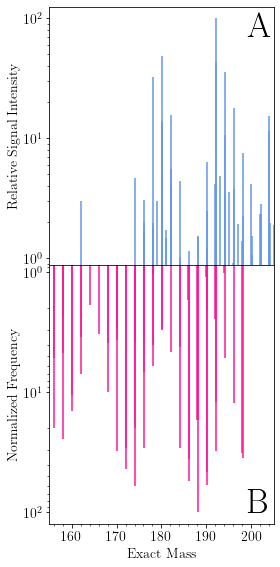

In [76]:
# for some flexibility, create a container for the figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 8), sharex=True) # create a figure object
#ax = fig.add_subplot(111) # create an axis object

# first, draw the experimental spectrum
axes[0].vlines(x=corrected_mass_list, ymin=0, ymax=normalized_abun, color='cornflowerblue')

# now the CNRN
axes[1].vlines(x=unique_sim_masses, ymin=0, ymax=norm_freq, color='deeppink')

#plt.bar(mass_list, rel_abundance, width=0.5)

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_ylim([0.875, 125])
axes[1].set_ylim([0.875, 125])
axes[0].set_xlim([155, 205])
axes[1].set_xlim([155, 205])

plt.gca().invert_yaxis()

axes[0].tick_params(axis="y", labelsize=14)
axes[0].tick_params(axis="x", labelsize=14)
axes[1].tick_params(axis="y", labelsize=14)
axes[1].tick_params(axis="x", labelsize=14)

axes[1].set_xlabel('Exact Mass',fontdict = font)
axes[0].set_ylabel('Relative Signal Intensity',fontdict = font)
axes[1].set_ylabel('Normalized Frequency',fontdict = font)

# turn on minor ticks

axes[0].minorticks_on()
axes[1].minorticks_on()
axes[0].text(199, 70, 'A', fontsize=35)
axes[1].text(199, 100, 'B', fontsize=35)

#plt.ylabel('Normalized Abundance')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('formose_mirror_plot.png', dpi=500, transparent=True)
plt.show()